In [1]:
# Dependencies and Setup
import pandas as pd

# Files to Load
# efficiency_to_load = "EV_range_efficiency.csv"
# registration_to_load = "ev_registration.csv"
# sales_to_load ="pev_sales.csv"
alt_fuel_to_load ="./resources/alt_fuel_stations.csv"
fl_reg_to_load ="./resources/fl_ev_reg.csv"
fl_zip_to_load ="./resources/zip_county.csv"

In [2]:
# Read the data into a Pandas DataFrame
# efficiency_df = pd.read_csv(efficiency_to_load)
# registration_df = pd.read_csv(registration_to_load)
# sales_df = pd.read_csv(sales_to_load)
alt_fuel_df = pd.read_csv(alt_fuel_to_load,low_memory=False)
fl_reg_df = pd.read_csv(fl_reg_to_load)
fl_zip_df = pd.read_csv(fl_zip_to_load)

In [3]:
# Determine if there are any missing values. 
# registration_df.count()

In [4]:
# Determine if there are any missing values. 
# efficiency_df.count()

In [5]:
# Determine if there are any missing values. 
# sales_df.count()

In [6]:
# Check Columns
# registration_df

In [7]:
# Check Columns
# sales_df.head()

In [8]:
# Check Columns
# efficiency_df.head()
alt_fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56800 entries, 0 to 56799
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    56800 non-null  object 
 1   Station Name                      56800 non-null  object 
 2   Street Address                    56798 non-null  object 
 3   Intersection Directions           4827 non-null   object 
 4   City                              56800 non-null  object 
 5   State                             56800 non-null  object 
 6   ZIP                               56800 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     52437 non-null  object 
 9   Status Code                       56800 non-null  object 
 10  Expected Date                     376 non-null    object 
 11  Groups With Access Code           56800 non-null  object 
 12  Acce

In [9]:
alt_fuel_cleanup_df = alt_fuel_df.drop(['Country','Fuel Type Code','Station Phone','Intersection Directions',
                                        'Street Address','Federal Agency Code','Groups With Access Code (French)',
                                        'Federal Agency Code','Access Detail Code','Federal Agency Name',
                                        'Federal Agency ID','NG PSI','Status Code','Plus4','Restricted Access',
                                        'EV Pricing (French)','BD Blends (French)','Access Days Time (French)',
                                        'Intersection Directions (French)','EV DC Fast Count','EV Other Info',
                                        'EV Network','EV Network Web','Expected Date','Access Days Time',
                                        'Cards Accepted','BD Blends','NG Fill Type Code','EV Level1 EVSE Num',
                                        'EV Level2 EVSE Num','Geocode Status','Date Last Confirmed','ID',
                                        'Updated At','Owner Type Code','Facility Type','Hydrogen Status Link',
                                        'NG Vehicle Class','LPG Primary','E85 Blender Pump','EV Connector Types',
                                        'Hydrogen Is Retail','Access Code','CNG Dispenser Num',
                                        'CNG On-Site Renewable Source','CNG Total Compression Capacity',
                                        'CNG Storage Capacity','LNG On-Site Renewable Source',
                                        'E85 Other Ethanol Blends','EV Pricing','LPG Nozzle Types',
                                        'Hydrogen Pressures','Hydrogen Standards','CNG Fill Type Code','CNG PSI',
                                        'CNG Vehicle Class','LNG Vehicle Class','EV On-Site Renewable Source'],axis = 1)
alt_fuel_cleanup_df


,Station Name,City,State,ZIP,Groups With Access Code,Latitude,Longitude,Open Date
0,Spire - Montgomery Operations Center,Montgomery,AL,36107,Private,32.367916,-86.267021,2010-12-01
1,PS Energy - Atlanta,Atlanta,GA,30303,Public - Card key at all times,33.745843,-84.398837,1994-07-15
2,Metropolitan Atlanta Rapid Transit Authority,Atlanta,GA,30324,Private - Government only,33.821911,-84.367461,1996-12-15
3,United Parcel Service,Atlanta,GA,30336,Private,33.760256,-84.543822,1997-01-01
4,Clean Energy - Texas Department of Transportation,Houston,TX,77007,Public - Credit card at all times,29.779918,-95.435385,1996-12-15
...,...,...,...,...,...,...,...,...
56795,Sheetz Store #713,Hagerstown,MD,21740,Public,39.602267,-77.729039,2021-07-28
56796,Kwik Trip #1062,West Bend,WI,53095,Public,43.426952,-88.158696,2021-07-29
56797,76,Pasadena,CA,91101,Public,34.157522,-118.132898,2021-07-29
56798,Lafferty Race Fuels,Amarillo,TX,79118,Public,35.119412,-101.813428,2021-07-29


In [10]:
alt_fuel_cleanup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56800 entries, 0 to 56799
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Station Name             56800 non-null  object 
 1   City                     56800 non-null  object 
 2   State                    56800 non-null  object 
 3   ZIP                      56800 non-null  object 
 4   Groups With Access Code  56800 non-null  object 
 5   Latitude                 56800 non-null  float64
 6   Longitude                56800 non-null  float64
 7   Open Date                55238 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.5+ MB


In [11]:
# Keep all the florida
alt_fuel_FL_df = alt_fuel_cleanup_df.loc[(alt_fuel_cleanup_df["State"] == "FL")]
# delete rows where longitude < -75
alt_fuel_FL_df = alt_fuel_FL_df[alt_fuel_FL_df.Longitude <= -75]

In [12]:
# transform string
def change_string (member):
    if member == "\xa032413":
        return "32413"
    elif member == '\xa033418' :
        return '33418'
    else:
        return member
    
alt_fuel_FL_df["ZIP"] = alt_fuel_FL_df["ZIP"].apply(change_string)
pd.to_numeric(alt_fuel_FL_df["ZIP"])

84       32570
85       32801
86       33162
260      32643
261      32211
         ...  
56665    33411
56681    33701
56724    32708
56728    33404
56729    33404
Name: ZIP, Length: 2825, dtype: int64

In [13]:
# transform string public = 0 private = 1  & planned = 2
def change_string (member):
    if member == "Public - Credit card after hours":
        return "0"
    elif member == 'Public - Call ahead' :
        return '0'
    elif member == 'Public - Card key after hours' :
        return '0'
    elif member == 'Private - Government only' :
        return '1'
    elif member == 'Public - Card key at all times' :
        return '0'
    elif member == 'Public - Credit card at all times' :
        return '0'
    elif member == 'TEMPORARILY UNAVAILABLE (Public)' :
        return '0'
    elif member == 'Private - Fleet customers only' :
        return '1'
    elif member == 'PLANNED - not yet accessible (Public)' :
        return '2'
    elif member == 'Public' :
        return '0'
    elif member == 'Private' :
        return '1'
    else:
        return member
    
alt_fuel_FL_df["Groups With Access Code"] = alt_fuel_FL_df["Groups With Access Code"].apply(change_string)

In [14]:
print(alt_fuel_FL_df["Groups With Access Code"].value_counts())

0    2512
1     285
2      28
Name: Groups With Access Code, dtype: int64


In [15]:
# Keep Only the year of "Open Date" column
alt_fuel_FL_df['Open Date'] = alt_fuel_FL_df['Open Date'].str.split('-').str[0]

# replace 77 NaN values in "Open Date" with 2021
alt_fuel_FL_df["Open Date"].fillna("2021", inplace = True)

In [16]:
# print(alt_fuel_FL_df["Open Date"].unique())
fl_stations_openDate_count_df = alt_fuel_FL_df["Open Date"].value_counts()
fl_stations_openDate_count_df

2021    809
2020    535
2019    353
2018    226
2017    191
2015    175
2012    151
2016    141
2011     88
2014     50
2013     50
2000     24
2010     10
2008      6
1999      4
2009      3
2006      3
1996      2
2007      2
2005      1
1991      1
Name: Open Date, dtype: int64

In [17]:
print(alt_fuel_FL_df.shape)
print(alt_fuel_FL_df.isnull().sum())
alt_fuel_FL_df.info()

(2825, 8)
Station Name               0
City                       0
State                      0
ZIP                        0
Groups With Access Code    0
Latitude                   0
Longitude                  0
Open Date                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2825 entries, 84 to 56729
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Station Name             2825 non-null   object 
 1   City                     2825 non-null   object 
 2   State                    2825 non-null   object 
 3   ZIP                      2825 non-null   object 
 4   Groups With Access Code  2825 non-null   object 
 5   Latitude                 2825 non-null   float64
 6   Longitude                2825 non-null   float64
 7   Open Date                2825 non-null   object 
dtypes: float64(2), object(6)
memory usage: 198.6+ KB


In [18]:
fl_reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   county       69 non-null     object
 1   2018         69 non-null     int64 
 2   2019         69 non-null     int64 
 3   2020         69 non-null     int64 
 4   Grand Total  69 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.8+ KB


In [19]:
# change dtype of ZIP to float to match
alt_fuel_FL_df = alt_fuel_FL_df.astype({'ZIP':'float64'})

In [20]:
# left join on ZIP  because not all counties have vehicles
alt_fuel_FL_df_merged = alt_fuel_FL_df.merge(fl_zip_df,how = 'left', on='ZIP')

In [21]:
alt_fuel_FL_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2825 entries, 0 to 2824
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Station Name             2825 non-null   object 
 1   City                     2825 non-null   object 
 2   State                    2825 non-null   object 
 3   ZIP                      2825 non-null   float64
 4   Groups With Access Code  2825 non-null   object 
 5   Latitude                 2825 non-null   float64
 6   Longitude                2825 non-null   float64
 7   Open Date                2825 non-null   object 
 8   county                   2825 non-null   object 
dtypes: float64(3), object(6)
memory usage: 220.7+ KB


In [22]:
alt_fuel_FL_df.describe()

,ZIP,Latitude,Longitude
count,2825.000000,2825.000000,2825.000000
mean,33289.927434,27.699058,-81.476470
std,713.850357,1.497050,1.343951
min,32003.000000,24.550549,-87.315713
25%,32810.000000,26.207326,-82.337345
50%,33160.000000,27.898202,-81.403658
75%,33701.000000,28.557330,-80.261056
max,36548.000000,30.826725,-80.033251


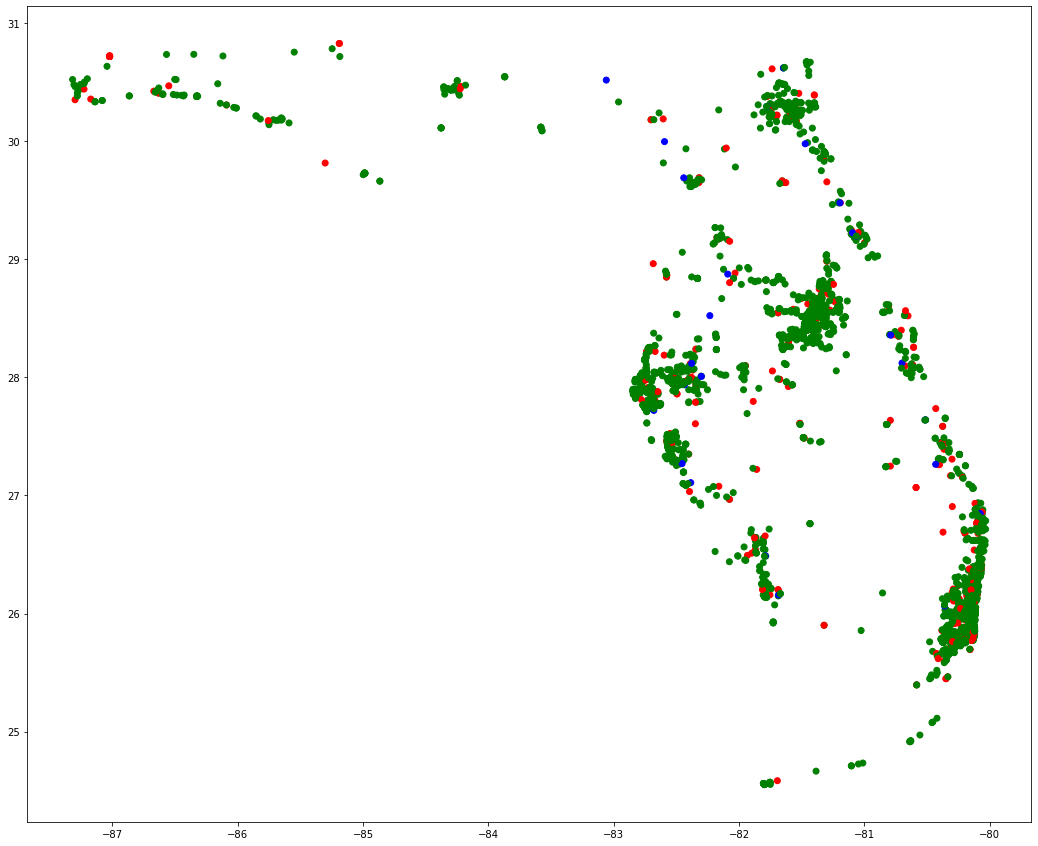

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
fig = plt.figure()
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='1':
            cols.append('red')
        elif l=='2':
            cols.append('blue')
        else:
            cols.append('green')
    return cols


col = pltcolor(alt_fuel_FL_df['Groups With Access Code'])
plt.scatter(x=alt_fuel_FL_df['Longitude'], y=alt_fuel_FL_df['Latitude'],c=col)
fig.set_figheight(15)
fig.set_figwidth(18)
plt.show()